# **AP155 Lab Assignment**
## Module 4: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points**.


### Student Information

_Full Name (Last Name, First Name)_: BALEJADO, Venser\
_Student No._: 2022-13875\
_Section_: THV-TX-2

### Submission Information

_Date and Time Submitted (most recent upload)_: 11-04-24 05:00 PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: VENSER HALILI BALEJADO**

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: <font color='red'>**100/100**</font>

Score breakdown:
* Problem 1 - <font color='red'>**50/50**</font>
* Problem 2 - <font color='red'>**50/50**</font>

<font color='red'>**signed GC Belinario**</font>

### PROBLEM 1
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits.

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(25 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$.

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(25 pts.)*

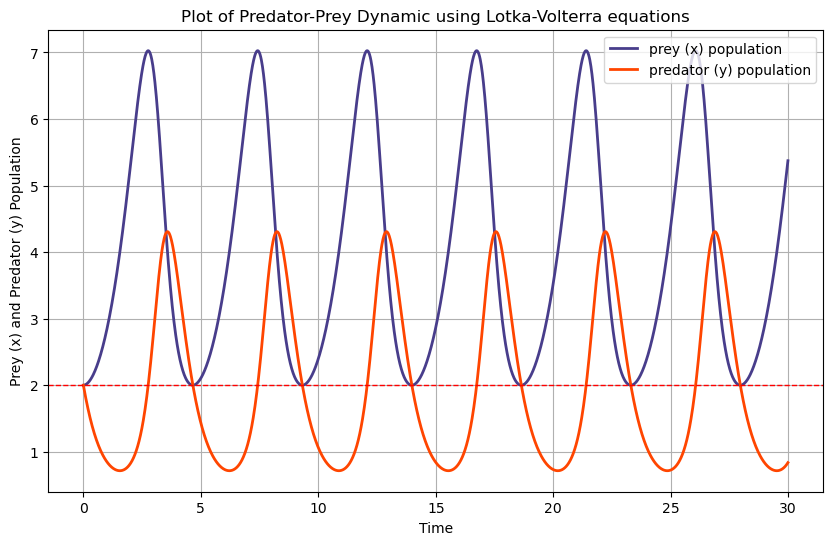

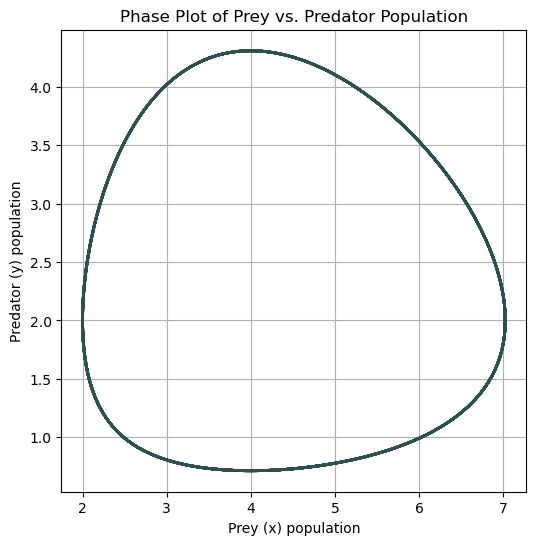

In [11]:
from numpy import arange, array  # imports functions for numerical operations and array manipulations
import matplotlib.pyplot as plt  # imports the library for plotting the data

# Initial Conditions
alpha = 1    # Represents the growth rate of the prey (x)
beta = 0.5   # Represents the rate at which predators (y) consumes the prey (x)
gamma = 0.5  # Represents the growth rate of predators (y) based on prey (x) population 
delta = 2    # Represents the death rate of predators (y)

# Defining the function/system of differential equations
def f(r,t): # r represents a vector
    x = r[0] # is the prey population (x)
    y = r[1] # is the predator population (y)
    fx = alpha*x - beta*x*y  # calculates the rate of change for prey
    fy = gamma*x*y - delta*y # calculates the rate of change for predators
    return array([fx,fy], float) # returns an array of the rate of changes

# setting up the parameters for the simulation
a = 0.0      # starting time for simulation
b = 30.0     # ending time for simulation
N = 2000     # number of Runge-Kutta time steps
h = (b-a)/N  # size of the time step

tpoints = arange(a,b,h) # here we set an array of time points from a to b with intervals h
xpoints = []            # creates an empty list for storage of prey population at each time steps
ypoints = []            # creates an empty list for storage of predator population at each time steps

r = array([2.0,2.0], float) # Sets the initial population to 2 for both the prey and predators

# Integrating the given differential equations using the 4th order Runge-Kutta method
for t in tpoints: # creates a loop over all time point in tpoints 
    xpoints.append(r[0]) # appends the current populations while going over the loop to xpoints
    ypoints.append(r[1]) # appends the current populations while going over the loop to ypoints
    # Calculating the intermediate slopes using fourth order Runge-Kutta method
    k1 = h*f (r,t)                        # calculates the slope at the beginning of the interval
    k2 = h*f (r + 0.5 * k1, t + 0.5 * h)  # calculates a slope at the midpoint making use of k1
    k3 = h*f (r + 0.5 * k2, t + 0.5 * h)  # calculates a slope at the midpoint making use of k2
    k4 = h*f (r+k3, t + h)                # calculates the slope at the end of the interval using k3
    r += (k1+2*k2+2*k3+k4)/6              # this updates our value of r by adding the weighted avarage of the slopes to get the next values

# Plotting the x and y as a function of times on the same axes from t = 0 to t = 30
plt.figure(figsize = (10,6))                                     # figure size
plt.plot(tpoints, xpoints, label = 'prey (x) population', color = 'darkslateblue', linewidth = 2) # creates the plot for prey population over time
plt.plot(tpoints, ypoints, label = 'predator (y) population', color = 'orangered', linewidth = 2) # creates the plot for predator population over time
plt.title('Plot of Predator-Prey Dynamic using Lotka-Volterra equations')                # sets the title for the plot
plt.xlabel('Time')                                               # sets the label for x-axis
plt.ylabel('Prey (x) and Predator (y) Population')               # sets the label for y-axis
plt.legend()                                                     # calls to display the legend
plt.axhline(2,color='red',linestyle='--',linewidth=1,label='initial population')
plt.grid()                                                       # sets the grid for the plot
plt.show()                                                       # calls to display the plot
print('''''')
print('')

plt.figure(figsize=(6,6))
plt.plot(xpoints, ypoints, color = 'darkslategrey', linewidth = 2)      # creates the plot for predator population over time
plt.title('Phase Plot of Prey vs. Predator Population')                # sets the title for the plot
plt.xlabel('Prey (x) population')                        # sets the label for x-axis
plt.ylabel('Predator (y) population')                    # sets the label for y-axis  
plt.grid()                                               # sets the grid for the plot
plt.show()                                               # calls to display the plot
# Observations
print('')

### Discussion for the Predator-Prey Dynamical system using Lotka-Volterra equations

**Discussing the constant parameters and their role in the Predator-prey dynamic system**

In the given problem, the parameters alpha, beta, omega, and gamma hold an important role in keeping the cyclic predator-prey dynamical system. The alpha represents the growth rate of the prey (rabbits) population. If there is no predation, the value a = 1 means that the rabbit population grows exponentially. If the alpha increases, this will mean that the food supply available for the predator increases, affecting our next three parameters. Next is the beta, which represents the rate at which the predators (foxes) consume their prey (rabbits). The value of the beta is proportional to the population of the prey and the predator; this is because the encounter between the rabbits and the foxes depends on their population values. This means that beta decreases the population by a factor proportional to its value. given that if the beta is high, it increases the rate of prey consumption, and if the beta is low, there is weaker predation or less interaction. Next is the gamma; it represents the efficiency with which the predator increases their population due to predation; the foxes represent growth rate as a function of prey consumption. This means that if there are more prey and the beta is high, the rate of the predation will be high, and if the gamma is high, there will be high efficiency in the increase of the predator population. Given that, a higher gamma means that predators are able to reproduce more efficiently with each prey they consume, and a lower gamma means the reproduction is less efficient even in the presence of a large prey population. Lastly, the delta represents the natural death rate of the predator population in the absence of a sufficient food source or prey population. Delta is proportional to the predator population. Given that, the delta in the problem limits the predator population by introducing decay that is independent of prey availability. A high delta means predators die quickly unless the prey population is large enough to offset the delta, and if the delta is too high, the predator population will delineate even in the presence of a large prey population.

**Analysis of the plot of Predator-Prey dynamic using Lotka-Volterra equations**

This lag of peak occurs because an increase in the prey population provides food for the predators, allowing their population to grow. However, as the population of the predator increases, they also tend to practice high consumption of prey populations, which causes the prey population to decrease. Eventually, the predator population also declines afterwards due to the scarcity of food due to decreasing prey population. This decrease in predator population allows the prey population to grow, showing the second peak of the blue plot, and when the prey population recovers, the cycle repeats over and over again. Additionally, this plot also shows that the prey population oscillates with higher amplitude than the predator population, which means that the prey population grows faster because of the intrinsic growth rate (alpha) and is only partially constrained by predation (beta), while the predator population growth is entirely dependent on prey availability. The parameters controlled the oscillatory dynamics of the Lotka-Volterra Predator-Prey model, where the interactions between the alpha and delta provided the balance between the prey’s ability to reproduce and the predator’s population tendency to decrease, and the beta and gamma set the intensity of interactions between the prey and the predator populations. Which means that if the prey can reproduce a fast enough number of its population (alpha is high relative to beta and gamma), they can sustain the predator population, and a strong interaction (predation, high beta and gamma) causes quick cycles of prey and predator periods of growth and decline, while a weaker interaction rate leads to a more stable population or slower cycles.

**Solving the Lotka-Volterra equation**

$$\frac{dx}{dy} = \frac{x}{y}\frac{(\alpha - \beta \; y)}{(\gamma \; x - \delta)}$$

$$\frac{(\gamma \; x - \delta)}{x} \;dx = \frac{(\alpha - \beta \; y)}{y}\; dy$$

$$\gamma \; dx - \frac{\delta}{x}\; dx = \frac{\alpha}{y} \; dy - \beta \; dy$$

$$\int \gamma \; dx - \int \frac{\delta}{x}\; dx =\int \frac{\alpha}{y} \; dy -\int \beta \; dy$$

$$\gamma \; x - \delta \; ln \; |x| = \alpha \; ln \; |y| - \beta \; y$$

$$\gamma \; x - \delta \; ln \; |x| - \alpha \; ln \; |y| + \beta \; y = constant$$

Plotting this with the initial values $\alpha = 1$, $\delta = 2$, and $\gamma = \sigma = 0.5$ while also keeping in mind the physical interpretation of these parameters, this equation will give us the phase plot


**Analysis of the Phase plot of Prey vs Predator populatio:n**
As seen in the phase plot, the parameters alpha, beta, omega, and delta define the cyclic behavior of where the prey population increases, which is followed by the increase of predator population due to availability of food, which then causes the decline in prey population due to larger predation, subsequently leading to a decline in predator populations when the prey population is scarce. 
 

<font color=red>Correctness of Code: 25/25 </font> \
<font color=red>Discussion of Code and Results: 25/25 </font>

### PROBLEM 2

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(25 pts.)*

2. Make a graph of $\theta$ as a function of time. *(25 pts.)*


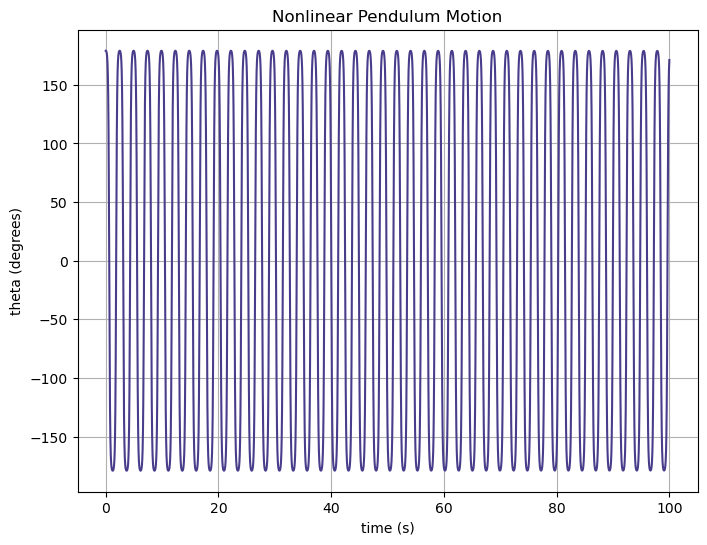

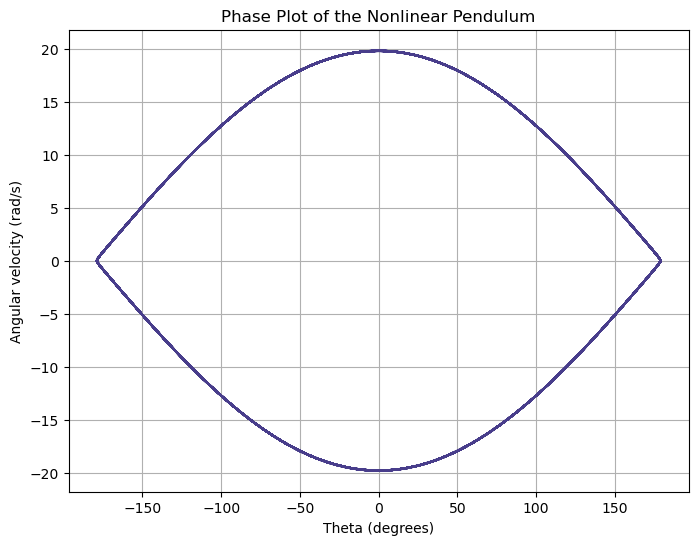

In [50]:
from math import pi, sqrt, sin
from numpy import arange, array, radians, rad2deg
import matplotlib.pyplot as plt

#Initial Conditions
g = 9.81                  # acceleration due to gravity in meters per second squared
l = 0.1                   # length of the pendulum in meters
theta_0 = radians (179.0) # initial angle in radians
omega_0 = 0.0             # initial angular velocity

# Defining the function for the pendulum differential equations
def f(r,t):          # r represents a vector
    theta, omega = r #
    ftheta = omega   # sets the rate of change of angle as the angular velocity 
    fomega = -(g/l)*sin(theta)           # the rate of change of the angular velocity is set to be the gravitational force acting on the pendulum 
    return array([ftheta,fomega] ,float) # return an array with both the rates of change


a = 0                   # starting time for the simulation
b = 100                  # ending time for the simulation
N = 10000                # number of Runge-Kutta time steps
#
h = (b-a)/N             # Time step size

tpoints = arange(a,b,h) # sets an array of time points from a to b with intervals of h

thetapoints = []        # creates an empty list for storage of angle at each time step
omegapoints = []        # creates an empyy list for storage of angular velocity at each time step

r = array([theta_0, omega_0], float) # sets the angle to 179 deegrees converted to radians and the angular velocity to 0

# Setting up the fourth order Runge-Kutta method
for t in tpoints:                         # creates a loop that goes over each time points in tpoints
    thetapoints.append(r[0])              # appends the current angle as the loop goes on
    omegapoints.append(r[1])              # appends the current angular velocity as the loop goes on
    # Calculating the intermediate slopes using fourth order Runge-Kutta method
    k1 = h*f (r,t)                        # calculates the slope at the beginning of interval
    k2 = h*f (r + 0.5 * k1, t + 0.5 * h)  # calculates a slope at the midpoints using the k1
    k3 = h*f (r + 0.5 * k2, t + 0.5 * h)  # calculates a slope at the midpoints using the k2
    k4 = h*f (r+k3, t + h)                # calculates the slope at the end of the interval using k3
    r += (k1+2*k2+2*k3+k4)/6              # updates the value of r by adding the weighted average of the slope we computed over the loop
                                          # computes new values of angle and angular velocity
# Plot of theta as a function of time
print('')                                                           # sets a space
plt.figure(figsize=(8, 6))                                          # sets the size of the figure
plt.plot(tpoints, rad2deg(thetapoints), color = 'darkslateblue')    # plots the angle in degrees over time
plt.xlabel('time (s)')                                              # sets the label for x-axis 
plt.ylabel('theta (degrees)')                                       # sets the label for y-axis
plt.title('Nonlinear Pendulum Motion')                              # sets the title of the plot
plt.grid()                                                          # adds a grid on the plot
plt.show()                                                          # calls for the plot to show

# Plot of phase plot (theta vs omega)
print('')
plt.figure(figsize=(8, 6)) 
plt.plot(rad2deg(thetapoints), omegapoints, color = 'darkslateblue')
plt.xlabel('Theta (degrees)')
plt.ylabel('Angular velocity (rad/s)')
plt.title('Phase Plot of the Nonlinear Pendulum')
plt.grid()
plt.show()
# Observations
# Tentative explanation : Since the values to compute for h which are a, b, and N are not given, we need to observe arbitrary values
# to give an explanation to the behaviour of the angle vs. time plot. I used a boundary from 0 to 10 of time interval and take the Runge kutta method
# and plotting them in different values of N thus the N, N*2, and N/2. As can be seen in the plot, the plot for the arbitrary time intervals behave for each level
# of time step. The N timestep which is the middle values in the observed ones gives the highest starting frequency among all the plots but gradually
# lost energy over time making the approximation have inaccuracy for this system

# The highest N value (2*N) shows that it starts with a lower frequency but was able to maintain its angle over more time showing that this shows the least 
# inaccuracy in its approximation over the time and is more ideal for observing the system for longer times

# The lowest N value (N/2) which halves the value of the middle N gives the same starting frequency as that of the doubled N value. However, after some time
# the system lose its energy until it does not oscillate anymore.

# However since we have no given values for the h, we are only able to relate them relative to our set arbitrary values and there seems to be no general value 
# for N that will give an accurate approximation for a non linear pendulum system

### Discussion for the nonlinear pendulum problem

**Analysis of the Nonlinear Pendulum Motion plot (Theta vs. time))**

The plot of the nonlinear pendulum motion shows an oscillatory behavior with a large initial angle of displacement, which is 179 degrees, resulting in a plot that is not perfectly sinusoidal. This is because at larger angles, the pendulum's behavior deviates from that of a simple harmonic motion, and the pendulum enters a nonlinear system. The plot shows a characteristic shape of a nonlinear oscillation where pendulum motion is asymmetric. Moreover, the plot shows that the pendulum's motion is periodic and conservative, showing a symmetric oscillatory pattern at around theta=0, and the pendulum reaches nearly the same positive and negative angle with each oscillation, maintaining its amplitude. Showing no decay in the amplitude over time means that the system is ideal and undamped. Which means that in an ideal system we are not losing energy over time. Given that, if the system is not an ideal one, we can expect that the amplitude will decrease over time. An example of a dampened and not ideal system will be in real-world conditions where there is friction and air resistance that will gradually cause the decrease in amplitude over time. Physically, this plot indicates that the pendulum we are observing is swinging back and forth in a periodic fashion, only reaching close but not reaching to ±180 degrees from the vertical. The large angle of the pendulum means that it is spending more time at the extremes of its motion, which are near the ±180 degrees, and less time in the middle. We expect this behavior from a nonlinear pendulum system.

**Analysis of the Phase Plot of the Nonlinear Pendulum**

The phase plot shows a closed system and a symmetric shape, implying that the pendulum's motion is conservative, meaning there's no energy loss due to damping. Additionally, the plot shows an eye-like shape, indicating that the relationship between the theta and the omega is not linear. This is due to the sin dependence in the equation of motion rather than a direct proportionality to theta. As we can also observe, the plot reaches maximum angular velocity near zero angles, meaning that this is where the pendulum passes through its lowest point, and this is where the gravitational potential energy is at its minimum. Moreover, we can observe that when the angles get close to ±180 degrees, the angular velocity drops to zero. This means that the pendulum is reaching the peak of its swing, where it stops for a while before changing direction, and at these angles all the energy is stored as gravitational potential energy. 

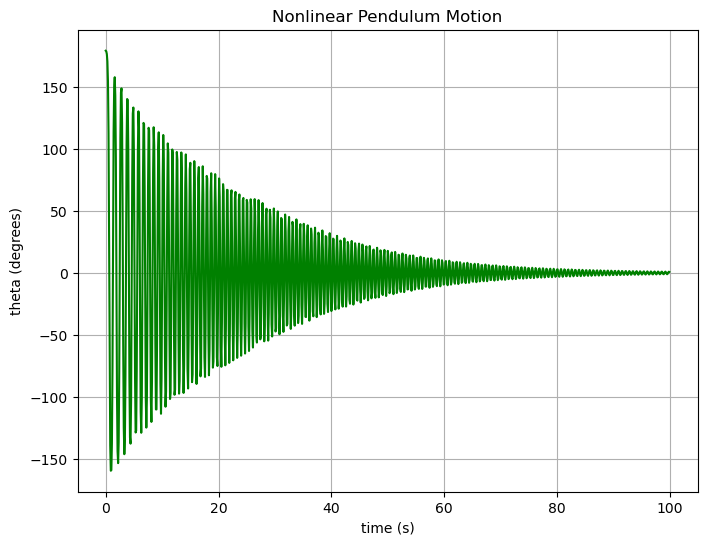

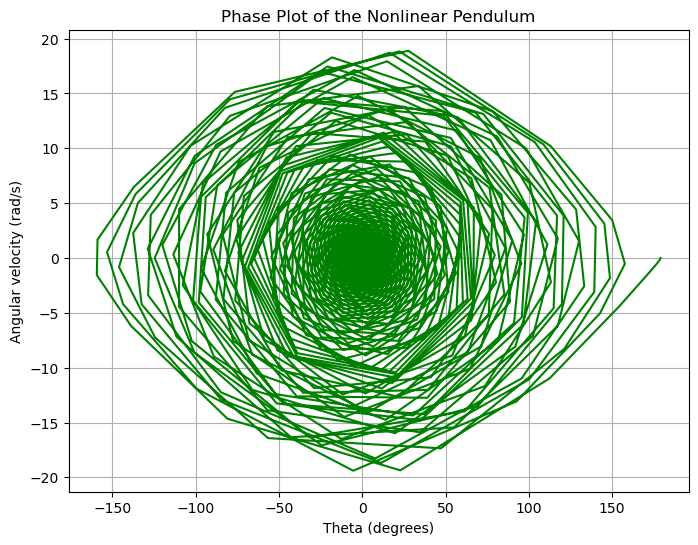

In [63]:
from math import pi, sqrt, sin
from numpy import arange, array, radians, rad2deg
import matplotlib.pyplot as plt

#Initial Conditions
g = 9.81                  # acceleration due to gravity in meters per second squared
l = 0.1                   # length of the pendulum in meters
theta_0 = radians (179.0) # initial angle in radians
omega_0 = 0.0             # initial angular velocity

# Defining the function for the pendulum differential equations
def f(r,t):          # r represents a vector
    theta, omega = r #
    ftheta = omega   # sets the rate of change of angle as the angular velocity 
    fomega = -(g/l)*sin(theta)           # the rate of change of the angular velocity is set to be the gravitational force acting on the pendulum 
    return array([ftheta,fomega] ,float) # return an array with both the rates of change


a = 0                   # starting time for the simulation
b = 100                  # ending time for the simulation
N = 1000                # number of Runge-Kutta time steps
#
h = (b-a)/N             # Time step size

tpoints = arange(a,b,h) # sets an array of time points from a to b with intervals of h

thetapoints = []        # creates an empty list for storage of angle at each time step
omegapoints = []        # creates an empyy list for storage of angular velocity at each time step

r = array([theta_0, omega_0], float) # sets the angle to 179 deegrees converted to radians and the angular velocity to 0

# Setting up the fourth order Runge-Kutta method
for t in tpoints:                         # creates a loop that goes over each time points in tpoints
    thetapoints.append(r[0])              # appends the current angle as the loop goes on
    omegapoints.append(r[1])              # appends the current angular velocity as the loop goes on
    # Calculating the intermediate slopes using fourth order Runge-Kutta method
    k1 = h*f (r,t)                        # calculates the slope at the beginning of interval
    k2 = h*f (r + 0.5 * k1, t + 0.5 * h)  # calculates a slope at the midpoints using the k1
    k3 = h*f (r + 0.5 * k2, t + 0.5 * h)  # calculates a slope at the midpoints using the k2
    k4 = h*f (r+k3, t + h)                # calculates the slope at the end of the interval using k3
    r += (k1+2*k2+2*k3+k4)/6              # updates the value of r by adding the weighted average of the slope we computed over the loop
                                          # computes new values of angle and angular velocity
# Plot of theta as a function of time
print('')                                                           # sets a space
plt.figure(figsize=(8, 6))                                          # sets the size of the figure
plt.plot(tpoints, rad2deg(thetapoints), color = 'green')    # plots the angle in degrees over time
plt.xlabel('time (s)')                                              # sets the label for x-axis 
plt.ylabel('theta (degrees)')                                       # sets the label for y-axis
plt.title('Nonlinear Pendulum Motion')                              # sets the title of the plot
plt.grid()                                                          # adds a grid on the plot
plt.show()                                                          # calls for the plot to show

# Plot of phase plot (theta vs omega)
print('')
plt.figure(figsize=(8, 6)) 
plt.plot(rad2deg(thetapoints), omegapoints, color = 'green')
plt.xlabel('Theta (degrees)')
plt.ylabel('Angular velocity (rad/s)')
plt.title('Phase Plot of the Nonlinear Pendulum')
plt.grid()
plt.show()

### Discussion of lesser sample size N relative to time

In these plots, we can see the relation of the sample size to the value of h and the characteristic of the system. If we take a very large N given a time interval, we will achieve an ideal and undamped system because eventually, small h will result in a very small value of theta, which is then approximated using a small-angle approximation, resulting in a system that does not lose energy at all. But as we can see in the plot and phase plot above, if we do not have a large enough N given a time interval, the system will experience a loss in energy, making it a damped system where the amplitude in the nonlinear pendulum motion plot decreases as time goes by and the system is not closed in the phase plot while also losing amplitude.

<font color=red>Correctness of Code: 25/25 </font> \
<font color=red>Discussion of Code and Results: 25/25 </font>